In [32]:
import numpy as np
class Client:
    def __init__(self, attributes):
        self.attributes = attributes
        self.clientID = attributes[0]

        self.distribution = attributes[1:-2]
        self.completion_time = attributes[-1]
        self.kl_divergence = self.calculate_kl_divergence()

    def __hash__(self):
        return hash(self.clientID)

    def __eq__(self, other):
        if not isinstance(other, Client):
            return NotImplemented
        return self.clientID == other.clientID

    def get_distribution(self):
        return self.distribution

    def get_attributes(self):
        return self.attributes

    def get_clientID(self):
        return self.clientID

    def calculate_score(self):
        # Calculate score based on some of the attributes
        return np.sum(self.attributes[1:-2])
    
    def calculate_kl_divergence(self, union_dist=np.full((10, 1), 0.2)):
        """
        计算两个分布之间的KL散度。
        :param p: 分布P，一个概率分布数组。
        :param q: 分布Q，另一个概率分布数组。
        :return: P和Q之间的KL散度。
        """
        # 确保概率分布不包含0，因为log(0)是未定义的
        client_dist = np.maximum(self.distribution, 1e-12)
        union_dist = np.maximum(union_dist, 1e-12)
        
        return np.sum(client_dist * np.log(client_dist / union_dist))   

# Example usage
attributes = [1, 5, 4, 3, 7, 2, 8, 6]  # Example list of attributes
client = Client(attributes)
print("Client ID:", client.get_clientID())
print("Client distribution:", client.get_distribution())
print("Client kl divergence:", client.calculate_kl_divergence())


Client ID: 1
Client distribution: [5, 4, 3, 7, 2]
Client kl divergence: 656.9406543827757


In [62]:
import math
from itertools import combinations

class Group:
    def __init__(self, clients, get_clients_per_group):
        if len(clients) != get_clients_per_group():
            raise ValueError(f"A complete group must have: {get_clients_per_group()} clients!")

        self.clients = clients
        self.AD = self.calculate_ad()
        self.GH = self.calculate_gh()
        self.maxDistance = self.calculate_max_distance()

        self.group_distribution = self.calculate_group_distribution()
        self.union_dist=np.full(len(self.group_distribution), 1 / len(self.group_distribution))

        self.group_kl_divergence = self.calculate_group_kl_divergence()

    def calculate_group_kl_divergence(self):
        """
        计算两个分布之间的KL散度。
        :param p: 分布P，一个概率分布数组。
        :param q: 分布Q，另一个概率分布数组。
        :return: P和Q之间的KL散度。
        """
        # 确保概率分布不包含0，因为log(0)是未定义的
        group_dist = np.maximum(self.group_distribution, 1e-12)
        union_dist = np.maximum(self.union_dist, 1e-12)
        
        return np.sum(group_dist * np.log(group_dist / union_dist))   

    def calculate_group_distribution(self):
        """
        计算组内所有客户的分布的平均值。
        :return: 组内所有客户的分布的平均值。
        """
        distribution_sum = np.sum([client.get_distribution() for client in self.clients], axis=0)

        return distribution_sum / sum(distribution_sum)


    def __eq__(self, other):
        if not isinstance(other, Group):
            return False
        if len(self.clients) != len(other.clients):
            return False
        return all(self.clients[i].get_clientID() == other.clients[i].get_clientID() for i in range(len(self.clients)))

    def calculate_ad(self):
        ordered_clients = sorted(self.clients, key=lambda client: client.get_score())
        return (ordered_clients[3].get_score() + ordered_clients[0].get_score()) / 2

    def calculate_gh(self):
        ordered_clients = sorted(self.clients, key=lambda client: client.get_score())
        ad = self.calculate_ad()
        return (ordered_clients[3].get_score() - ordered_clients[0].get_score()) / \
               (1 + abs(ad - ordered_clients[1].get_score()) + abs(ad - ordered_clients[2].get_score()))

    def calculate_max_distance(self):
        distances = [self.euclidean_distance(st1, st2) for st1, st2 in combinations(self.clients, 2)]
        return max(distances)

    def euclidean_distance(self, s1, s2):
        s1_attributes = s1.get_attributes()
        s2_attributes = s2.get_attributes()
        return math.sqrt(sum((s1_attributes[i] - s2_attributes[i]) ** 2 for i in range(1, 8)))

    # Additional getters
    def get_clients(self):
        return self.clients

    def get_gh(self):
        return self.GH

    def get_ad(self):
        return self.AD

    def get_max_distance(self):
        return self.maxDistance

# Assuming client class and a function get_clients_per_group() are defined
# Example usage
clients = [Client([i, i+1, i+2, i+3, i+4, i+5, i+6, i+7, i+8]) for i in range(4)]

group = Group(clients, lambda: 4)
print("Group KL Divergence:", group.group_kl_divergence)
print("Group Distribution:", group.group_distribution)
print("Group Heterogeneity:", group.get_gh())
print("Group Average Distance:", group.get_ad())
print("Group Max Distance:", group.get_max_distance())


Group KL Divergence: 0.06050698143760225
Group Distribution: [0.08333333 0.11666667 0.15       0.18333333 0.21666667 0.25      ]
Group Heterogeneity: 2.5714285714285716
Group Average Distance: 30.0
Group Max Distance: 7.937253933193772


In [57]:
a = [0,0.3,0.2,0.1,0.4]
b = [0.1,0.2,0.3,0.4,0]

group_dist = np.maximum(a, 1e-12)
union_dist = np.maximum(b, 1e-12)

np.sum(group_dist * np.log(group_dist / union_dist)) 

10.587809228295257

In [ ]:
# import pygad
# import numpy

# function_inputs = [4,-2,3.5,5,-11,-4.7]
# desired_output = 44

# def fitness_func(ga_instance, solution, solution_idx):
#     output = numpy.sum(solution*function_inputs)
#     fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
#     return fitness

# fitness_function = fitness_func

# def on_start(ga_instance):
#     print("on_start()")

# def on_fitness(ga_instance, population_fitness):
#     print("on_fitness()")

# def on_parents(ga_instance, selected_parents):
#     print("on_parents()")

# def on_crossover(ga_instance, offspring_crossover):
#     print("on_crossover()")

# def on_mutation(ga_instance, offspring_mutation):
#     print("on_mutation()")

# def on_generation(ga_instance):
#     print("on_generation()")

# def on_stop(ga_instance, last_population_fitness):
#     print("on_stop()")

# ga_instance = pygad.GA(num_generations=3,
#                        num_parents_mating=5,
#                        fitness_func=fitness_function,
#                        sol_per_pop=10,
#                        num_genes=len(function_inputs),
#                        on_start=on_start,
#                        on_fitness=on_fitness,
#                        on_parents=on_parents,
#                        on_crossover=on_crossover,
#                        on_mutation=on_mutation,
#                        on_generation=on_generation,
#                        on_stop=on_stop)

# ga_instance.run()

Generation = 1
Fitness    = 12.852230894991541
Change     = 12.852230894991541
solution     = [ 2.16601205  0.28165714 -0.6653148   0.90129972 -1.83230757 -2.8698252 ]
result     = 43.92219249652683
Generation = 2
Fitness    = 12.852230894991541
Change     = 0.0
solution     = [ 2.16601205  0.28165714 -0.6653148   0.90129972 -1.83230757 -2.8698252 ]
result     = 43.92219249652683
Generation = 3
Fitness    = 94.94860125533144
Change     = 82.0963703603399
solution     = [-1.5023238  -2.79815962 -2.91264045  0.7831372  -3.20772186 -3.27575725]
result     = 43.98946798597579
Generation = 4
Fitness    = 94.94860125533144
Change     = 0.0
solution     = [-1.5023238  -2.79815962 -2.91264045  0.7831372  -3.20772186 -3.27575725]
result     = 43.98946798597579
Generation = 5
Fitness    = 94.94860125533144
Change     = 0.0
solution     = [-1.5023238  -2.79815962 -2.91264045  0.7831372  -3.20772186 -3.27575725]
result     = 43.98946798597579
Generation = 6
Fitness    = 94.94860125533144
Change   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation = 953
Fitness    = 19001.38523614472
Change     = 0.0
solution     = [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
result     = 43.99994737225799
Generation = 954
Fitness    = 19001.38523614472
Change     = 0.0
solution     = [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
result     = 43.99994737225799
Generation = 955
Fitness    = 19001.38523614472
Change     = 0.0
solution     = [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
result     = 43.99994737225799
Generation = 956
Fitness    = 19001.38523614472
Change     = 0.0
solution     = [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
result     = 43.99994737225799
Generation = 957
Fitness    = 19001.38523614472
Change     = 0.0
solution     = [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
result     = 43.99994737225799
Generation = 958
Fitness    = 19001.38523614472
Change     = 0.0
solution  

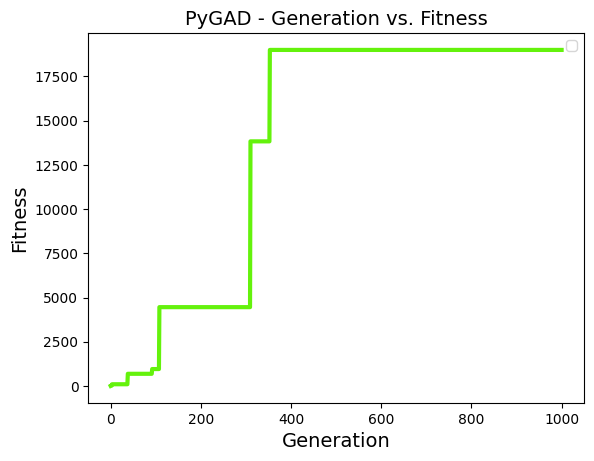

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parameters of the best solution : [-1.74215001 -2.15881341 -2.44032172  1.0981183  -3.08568338 -3.35296552]
Fitness value of the best solution = 19001.38523614472
Index of the best solution : 0
Predicted output based on the best solution : 43.99994737225799
Best fitness value reached after 353 generations.


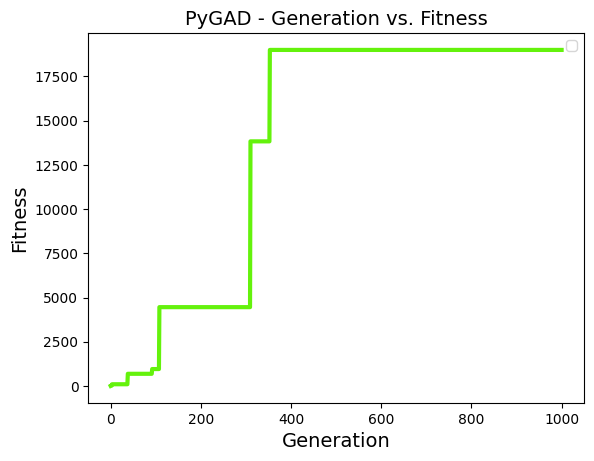

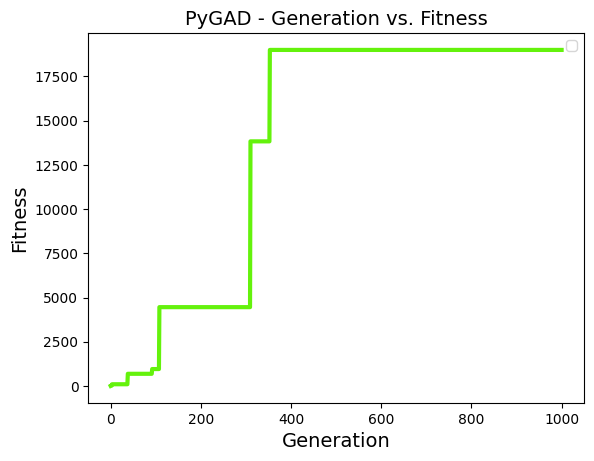

In [21]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 1000 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")
    print(f"solution     = {ga_instance.best_solution()[0]}")
    print(f"result     = {numpy.sum(ga_instance.best_solution()[0] * numpy.array(function_inputs))}")
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

In [15]:
?loaded_ga_instance.best_solution

Signature: loaded_ga_instance.best_solution(pop_fitness=None)
Docstring:
Returns information about the best solution found by the genetic algorithm.
Accepts the following parameters:
    pop_fitness: An optional parameter holding the fitness values of the solutions in the latest population. If passed, then it save time calculating the fitness. If None, then the 'cal_pop_fitness()' method is called to calculate the fitness of the latest population.
The following are returned:
    -best_solution: Best solution in the current population.
    -best_solution_fitness: Fitness value of the best solution.
    -best_match_idx: Index of the best solution in the current population.
File:      ~/.conda/envs/leofl2/lib/python3.11/site-packages/pygad/pygad.py
Type:      method

In [12]:
numpy.sum(solution * function_inputs)

43.99999612903902

In [22]:
?pygad.GA.plot_fitness

Signature:
pygad.GA.plot_fitness(
    self,
    title='PyGAD - Generation vs. Fitness',
    xlabel='Generation',
    ylabel='Fitness',
    linewidth=3,
    font_size=14,
    plot_type='plot',
    color='#64f20c',
    label=None,
    save_dir=None,
)
Docstring:
Creates, shows, and returns a figure that summarizes how the fitness value evolved by generation. Can only be called after completing at least 1 generation. If no generation is completed, an exception is raised.

Accepts the following:
    title: Figure title.
    xlabel: Label on the X-axis.
    ylabel: Label on the Y-axis.
    linewidth: Line width of the plot. Defaults to 3.
    font_size: Font size for the labels and title. Defaults to 14. Can be a list/tuple/numpy.ndarray if the problem is multi-objective optimization.
    plot_type: Type of the plot which can be either "plot" (default), "scatter", or "bar".
    color: Color of the plot which defaults to "#64f20c". Can be a list/tuple/numpy.ndarray if the problem is multi-ob

In [ ]:
import random

# Problem configuration
numbers = [random.randint(1, 100) for _ in range(10)]

# Genetic algorithm parameters
population_size = 100
generations = 50
crossover_rate = 0.7
mutation_rate = 0.01

# Helper functions
def create_individual():
    return [random.randint(0, 1) for _ in range(len(numbers))]

def calculate_fitness(individual):
    group1 = sum(numbers[i] for i in range(len(numbers)) if individual[i] == 0)
    group2 = sum(numbers[i] for i in range(len(numbers)) if individual[i] == 1)
    return abs(group1 - group2)

def selection(population):
    sorted_population = sorted(population, key=lambda x: calculate_fitness(x))
    return sorted_population[:len(sorted_population)//2]

def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    return parent1, parent2

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

# Initialize population
population = [create_individual() for _ in range(population_size)]

# Run GA
for _ in range(generations):
    # Selection
    selected = selection(population)
    
    # Crossover
    children = []
    for i in range(0, len(selected), 2):
        child1, child2 = crossover(selected[i], selected[i+1])
        children.append(mutate(child1))
        children.append(mutate(child2))
    
    # New generation
    population = selected + children

# Best solution
best_individual = sorted(population, key=lambda x: calculate_fitness(x))[0]
best_fitness = calculate_fitness(best_individual)

print("Best Fitness:", best_fitness)
print("Best Grouping:", best_individual)


In [ ]:
numbers

In [ ]:
import random

# 数据配置
data_points = [random.randint(1, 100) for _ in range(50)]

# 遗传算法参数
population_size = 50
generations = 100
crossover_rate = 0.8
mutation_rate = 0.05
max_groups = 10  # 假设最多10组

def create_individual():
    return [random.randint(0, max_groups-1) for _ in range(len(data_points))]

def calculate_fitness(individual):
    group_sums = {}
    for idx, group_id in enumerate(individual):
        if group_id not in group_sums:
            group_sums[group_id] = []
        group_sums[group_id].append(data_points[idx])
    
    # 计算每个组的平均值和总的方差
    intra_group_variances = [sum((x - sum(group)/len(group))**2 for x in group) for group in group_sums.values()]
    inter_group_variance = sum((sum(group)/len(group) - sum(data_points)/len(data_points))**2 for group in group_sums.values())
    
    # 适应度是最小化内部方差和最大化组间方差的组合
    return sum(intra_group_variances) - inter_group_variance

def selection(population):
    sorted_population = sorted(population, key=lambda x: calculate_fitness(x))
    return sorted_population[:len(sorted_population)//2]

def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    return parent1, parent2

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, max_groups-1)
    return individual

# 初始化种群
population = [create_individual() for _ in range(population_size)]

# 运行遗传算法
for _ in range(generations):
    # 选择
    selected = selection(population)
    
    # 交叉和变异
    children = []
    for i in range(0, len(selected), 2):
        if i+1 < len(selected):
            child1, child2 = crossover(selected[i], selected[i+1])
            children.append(mutate(child1))
            children.append(mutate(child2))
    
    # 新一代
    population = selected + children

# 最佳解决方案
best_individual = sorted(population, key=lambda x: calculate_fitness(x))[0]
best_fitness = calculate_fitness(best_individual)

print("Best Fitness:", best_fitness)
print("Best Grouping:", best_individual)


In [3]:
import numpy as np
import pandas as pd

# 生成第一个矩阵，100x10，每行元素之和为1
client_num = 100
client_idx = np.arange(1, 101).reshape((100, 1))
client_distribution = np.zeros((client_num, 10))
client_capability = np.random.randint(1, 6, size=(client_num, 1))
# 对每一行，随机选择两个位置设置为0.5
for row in client_distribution:
    indices = np.random.choice(range(10), size=2, replace=False)
    row[indices] = 0.5
# 生成第二个矩阵，100x1，每个元素为5-20之间的随机整数
merged_matrix = np.hstack((client_idx, client_distribution, client_capability))
df = pd.DataFrame(merged_matrix)

# 将DataFrame保存为Excel文件
df.to_csv("clients_info.csv", index=False)

In [12]:
client_idx.shape

(100,)

In [23]:
import random
import numpy as np
# 数据配置
data_points = [random.randint(1, 100) for _ in range(50)]


# 生成第一个矩阵，100x10，每行元素之和为1
# matrix1 = np.random.rand(100, 10)
# matrix1 /= matrix1.sum(axis=1, keepdims=True)
matrix1 = np.zeros((100, 10))

# 对每一行，随机选择两个位置设置为0.5
for row in matrix1:
    indices = np.random.choice(range(10), size=2, replace=False)
    row[indices] = 0.5
# 生成第二个矩阵，100x1，每个元素为5-20之间的随机整数
matrix2 = np.random.randint(5, 21, size=(100, 1))
# 遗传算法参数
import numpy as np

matrix = np.full((10, 1), 0.2)
population_size = 100
generations = 1000
crossover_rate = 0.8
mutation_rate = 0.05
max_groups = 10  # 假设最多10组

In [24]:
# import random
# import numpy as np
# # 数据配置
# data_points = [random.randint(1, 100) for _ in range(50)]


# # 生成第一个矩阵，100x10，每行元素之和为1
# # matrix1 = np.random.rand(100, 10)
# # matrix1 /= matrix1.sum(axis=1, keepdims=True)
# matrix1 = np.zeros((100, 10))

# # 对每一行，随机选择两个位置设置为0.5
# for row in matrix1:
#     indices = np.random.choice(range(10), size=2, replace=False)
#     row[indices] = 0.5
# # 生成第二个矩阵，100x1，每个元素为5-20之间的随机整数
# matrix2 = np.random.randint(5, 21, size=(100, 1))
# # 遗传算法参数
# import numpy as np

# matrix = np.full((10, 1), 0.2)
# population_size = 100
# generations = 1000
# crossover_rate = 0.8
# mutation_rate = 0.05
# max_groups = 10  # 假设最多10组

def normalize_distribution(distribution):
    """
    将一个分布归一化，使得其元素之和为1。
    :param distribution: 一个未归一化的分布数组。
    :return: 归一化后的分布数组。
    """
    distribution_sum = sum(distribution)
    if distribution_sum == 0:
        # 避免除以0的情况，如果分布总和为0，则返回均匀分布
        return np.ones_like(distribution) / len(distribution)
    else:
        return distribution / distribution_sum

def kl_divergence(p, q):
    """
    计算两个分布之间的KL散度。
    :param p: 分布P，一个概率分布数组。
    :param q: 分布Q，另一个概率分布数组。
    :return: P和Q之间的KL散度。
    """
    # 确保概率分布不包含0，因为log(0)是未定义的
    p = np.maximum(p, 1e-12)
    q = np.maximum(q, 1e-12)
    
    return np.sum(p * np.log(p / q))
def create_individual():
    return [random.randint(0, max_groups-1) for _ in range(len(matrix2))]

def calculate_fitness(individual):
    group_sums = {}
    for idx, group_id in enumerate(individual):
        if group_id not in group_sums:
            group_sums[group_id] = np.zeros((10, 1))
        group_sums[group_id] = np.add(group_sums[group_id], matrix1[idx].reshape(10, 1))
    # 计算每个组的平均值和总的方差
    # group_sums = [normalize_distribution(group) for group in group_sums.values()]
    total_kl = 0
    for key,value in group_sums.items():
        group_sums[key] =  normalize_distribution(value)
        total_kl += kl_divergence(normalize_distribution(value), matrix)
    return total_kl

def selection(population):
    sorted_population = sorted(population, key=lambda x: calculate_fitness(x))
    return sorted_population[:len(sorted_population)//2]

def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    return parent1, parent2

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, max_groups-1)
    return individual

# 初始化种群
population = [create_individual() for _ in range(population_size)]

# 运行遗传算法
for _ in range(generations):
    # 选择
    selected = selection(population)
    
    # 交叉和变异
    children = []
    for i in range(0, len(selected), 2):
        if i+1 < len(selected):
            child1, child2 = crossover(selected[i], selected[i+1])
            children.append(mutate(child1))
            children.append(mutate(child2))
    
    # 新一代
    population = selected + children

# 最佳解决方案
best_individual = sorted(population, key=lambda x: calculate_fitness(x))[0]
best_fitness = calculate_fitness(best_individual)

print("Best Fitness:", best_fitness)
print("Best Grouping:", best_individual)
calculate_fitness(best_individual)

Best Fitness: -6.041705047576157
Best Grouping: [9, 3, 2, 5, 7, 2, 0, 8, 8, 2, 9, 6, 0, 2, 1, 9, 9, 7, 9, 2, 1, 3, 6, 5, 1, 1, 6, 2, 4, 9, 0, 8, 7, 3, 5, 1, 7, 3, 9, 4, 0, 0, 4, 3, 3, 9, 4, 1, 2, 1, 4, 1, 9, 7, 7, 8, 6, 9, 7, 0, 2, 6, 8, 5, 6, 6, 2, 7, 6, 6, 4, 1, 5, 1, 3, 0, 4, 1, 6, 4, 2, 7, 9, 5, 3, 0, 8, 4, 4, 8, 0, 5, 5, 4, 8, 8, 8, 0, 1, 7]


-6.041705047576157

In [ ]:
best_individual

In [ ]:
matrix1

In [ ]:
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    return parent1, parent2

In [25]:
??random.randint

Signature: random.randint(a, b)
Docstring:
Return random integer in range [a, b], including both end points.
        
Source:   
    def randint(self, a, b):
        """Return random integer in range [a, b], including both end points.
        """

        return self.randrange(a, b+1)
File:      ~/.conda/envs/leofl2/lib/python3.11/random.py
Type:      method